## Le code de chargement du fichier.

In [1]:
# compatibilité python 2 et python 3
from __future__ import division, print_function, unicode_literals

# imports
import numpy as np
import os

# stabilité du notebook d'une exécution à l'autre
np.random.seed(42)

# jolies figures directement dans le notebook
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# ignorer les warnings inutiles (voir SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

Blurry path 01 : dataset\Livrable1\Blurry\blurry_001.jpg
Noizy path 04 dataset\Livrable1\Noisy\noisy_004.jpg


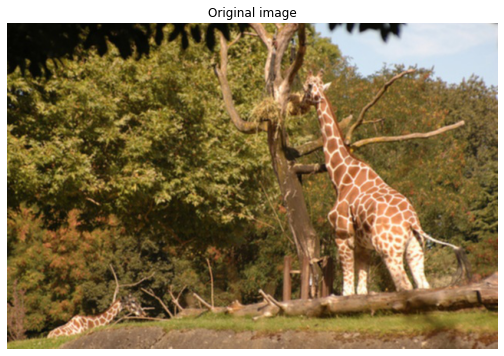

In [182]:
# Get the dataset

import pandas as pd
import pathlib
import imageio

#Blurry images
paths_blurry = pathlib.Path('./dataset/Livrable1/Blurry/').glob('*.jpg') #Get all files blurred
sorted_blurry = sorted([x for x in paths_blurry]) #Order by number

paths_noisy = pathlib.Path('./dataset/Livrable1/Noisy/').glob('*.jpg') #Get all files noised
sorted_noisy = sorted([x for x in paths_noisy]) #Order by number

#test
print("Blurry path 01 :",sorted_blurry[0]) #For instance, return the first blurry image path
print("Noizy path 04", sorted_noisy[3]) #For instance, return the 4th noisy image path

#For exemple, we will use this photo
im = imageio.imread(sorted_blurry[0])
im2 = imageio.imread(sorted_blurry[0])

tab = [im,im2]

plt.figure(figsize=(18, 6))
plt.axis('off')
plt.title("Original image")
plt.imshow(im)
plt.show()

In [94]:
import matplotlib.gridspec as gridspec
import math
def disp_img(images, rows = 1, h=30, w=20) :
    fig=plt.figure(figsize=(h, w))
    columns = math.ceil(len(images)/rows)    
    spec = gridspec.GridSpec(ncols=columns, nrows=rows, figure=fig)
    for i in range(0, len(images)):
        img = images[i]
        fig.add_subplot(spec[math.floor(i/columns), i%columns])
        plt.axis('off')
        plt.imshow(img)
    plt.show()

## Le code du débruitage sur un sous-ensemble d’images bruitées.

**Classical methods**

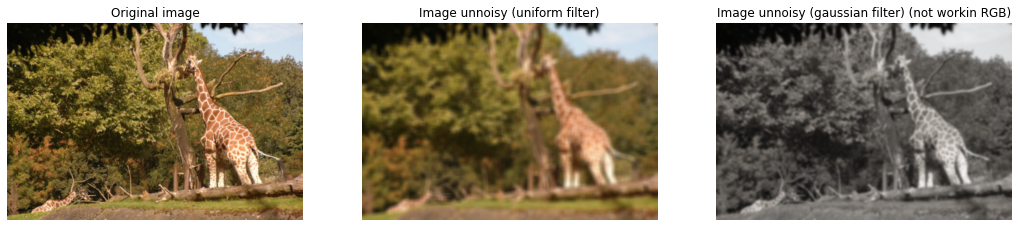

In [114]:
from scipy import ndimage
import cv2

plt.figure(figsize=(18, 6))

plt.subplot(131)
plt.imshow(im)
plt.axis('off')
plt.title("Original image")

#Uniform classical on RGB
unif_denoised = ndimage.uniform_filter(im, size=(11, 11, 1)) #1 to keep colors
plt.subplot(132)
plt.imshow(unif_denoised)
plt.axis('off')
plt.title("Image unnoisy (uniform filter)")

#Gaussian classical on RGB
gauss_denoised = ndimage.gaussian_filter(im, sigma=2) #Not working in RGB :(
plt.subplot(133)
plt.imshow(gauss_denoised)
plt.axis('off')
plt.title("Image unnoisy (gaussian filter) (not workin RGB)")

plt.show()

**OpenCV Methods**

https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_filtering/py_filtering.html

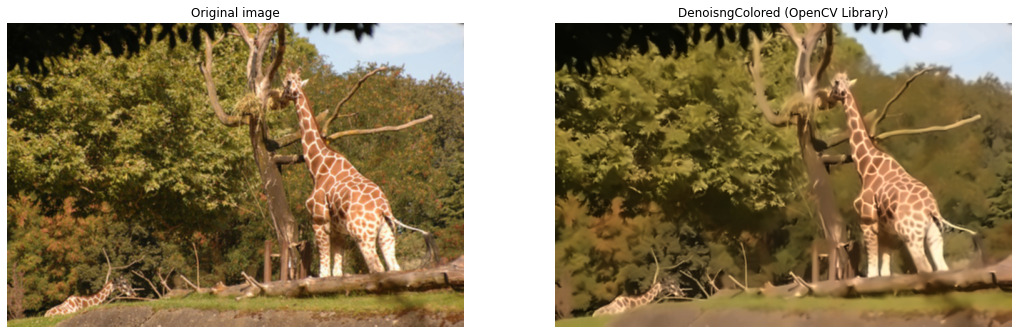

In [96]:
#OpenCV Unnoisy method
#converts image to CIELAB colorspace and then separately denoise L and AB components with given h
#h (float) : 
        #Parameter regulating filter strength for luminance component.
        #Bigger h value perfectly removes noise but also removes image details,
        #smaller h value preserves details but also preserves some noise 
#hColor(float) : 
        #The same as h but for color components.
        #For most images value equals 10 will be enough to remove colored noise 
        #and do not distort colors
        #Ils font un kernel de 10 pour colorbleed

plt.figure(figsize=(18, 6))

plt.subplot(121)
plt.imshow(im)
plt.axis('off')
plt.title("Original image")

plt.subplot(122)
dst	= cv2.fastNlMeansDenoisingColored(im,h = 10,hColor = 10) #here
plt.imshow(dst)
plt.axis('off')
plt.title("DenoisngColored (OpenCV Library)")
plt.show()

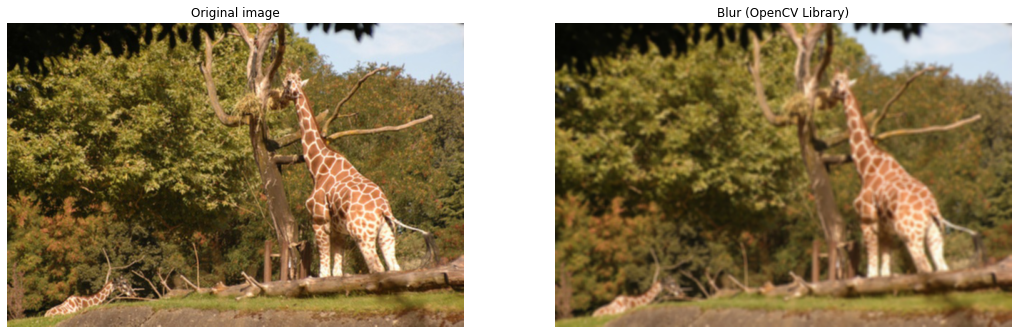

In [97]:
#OpenCV Blur
#This is done by convolving the image with a normalized box filter.
#It simply takes the average of all the pixels under kernel area 
#and replaces the central element with this average. 

plt.figure(figsize=(18, 6))

plt.subplot(121)
plt.imshow(im)
plt.axis('off')
plt.title("Original image")

plt.subplot(122)
blur = cv2.blur(im,(5,5)) #here
plt.imshow(blur)
plt.axis('off')
plt.title("Blur (OpenCV Library)")

plt.show()

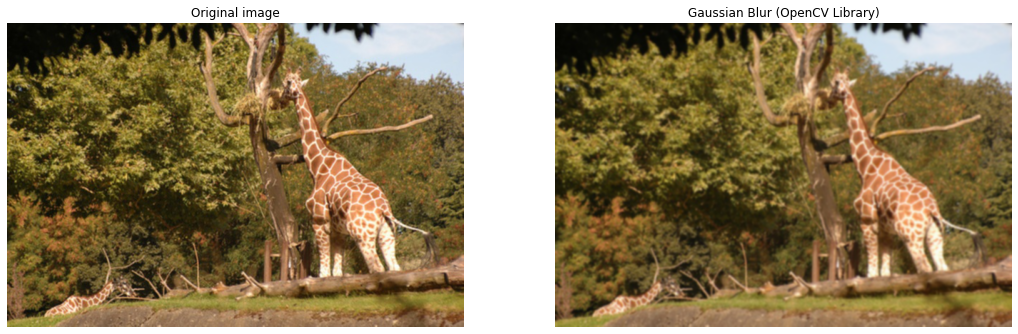

In [98]:
#OpenCV GaussianBlur
#Gaussian kernel is used

plt.figure(figsize=(18, 6))

plt.subplot(121)
plt.imshow(im)
plt.axis('off')
plt.title("Original image")

plt.subplot(122)
blur = cv2.GaussianBlur(im,(5,5),0) #here
plt.imshow(blur)
plt.axis('off')
plt.title("Gaussian Blur (OpenCV Library)")

plt.show()

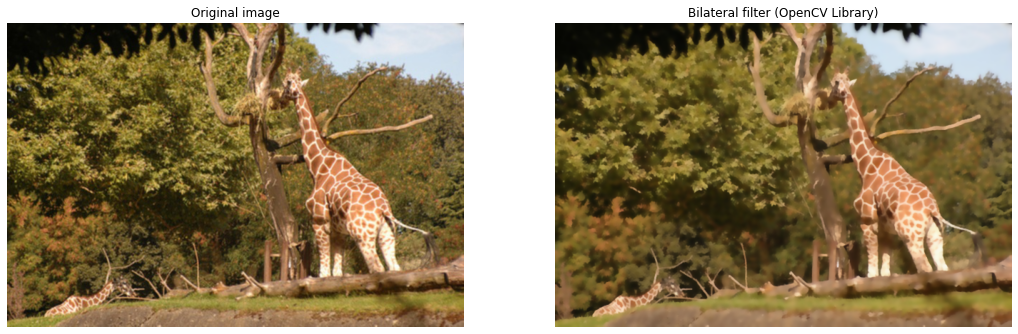

In [180]:
#OpenCV MedianBlur
#computes the median of all the pixels under the kernel window
#and the central pixel is replaced with this median value.
#This is highly effective in removing salt-and-pepper noise. 

plt.figure(figsize=(18, 6))

plt.subplot(121)
plt.imshow(im)
plt.axis('off')
plt.title("Original image")

plt.subplot(122)
median = cv2.medianBlur(im,5) #here
plt.imshow(blur)
plt.axis('off')
plt.title("Bilateral filter (OpenCV Library)")

plt.show()

###################################ICI NICO##################################
#disp_img(tab, rows = 1, h=30, w=20)

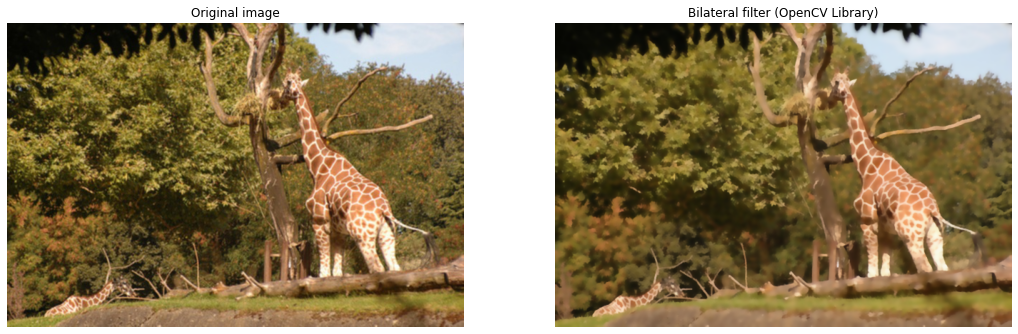

In [100]:
#OpenCV Bilateral filter
#highly effective at noise removal while preserving edges.
#But the operation is slower compared to other filters
# [...]

plt.figure(figsize=(18, 6))

plt.subplot(121)
plt.imshow(im)
plt.axis('off')
plt.title("Original image")

plt.subplot(122)
blur = cv2.bilateralFilter(im,9,75,75) #here
plt.imshow(blur)
plt.axis('off')
plt.title("Bilateral filter (OpenCV Library)")

plt.show()

To remove the noise, we blur images

## Le code de l’affutage sur un sous-ensembles d’images floutées.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


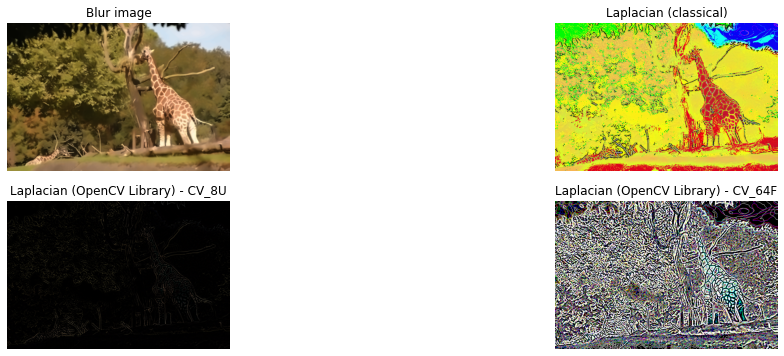

In [101]:
#Laplacian

laplacian_im = ndimage.laplace(dst) #This function is for 2D
laplacian_8 = cv2.Laplacian(dst,cv2.CV_8U) #CV_64F
laplacian_16 = cv2.Laplacian(dst,cv2.CV_16S) #CV_16S
laplacian_64 = cv2.Laplacian(dst,cv2.CV_64F) #CV_64F

plt.figure(figsize=(18, 6))

plt.subplot(221)
plt.imshow(dst)
plt.axis('off')
plt.title("Blur image")
plt.subplot(222)
plt.imshow(laplacian_im)
plt.axis('off')
plt.title("Laplacian (classical)")
plt.subplot(223)
plt.imshow(laplacian_8)
plt.axis('off')
plt.title("Laplacian (OpenCV Library) - CV_8U")
plt.subplot(224)
plt.imshow(laplacian_64)
plt.axis('off')
plt.title("Laplacian (OpenCV Library) - CV_64F")

plt.show()



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Sobel Y')

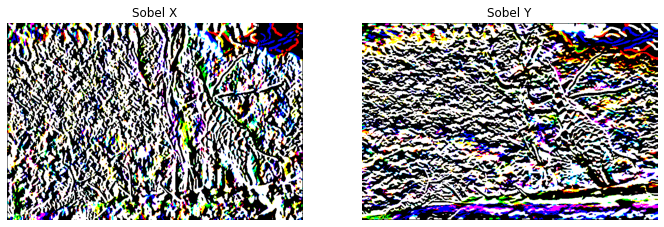

In [176]:
#Sobel classique

sobelx = cv2.Sobel(dst,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(dst,cv2.CV_64F,0,1,ksize=5)

plt.figure(figsize=(18, 6))

plt.subplot(131)
plt.imshow(sobelx)
plt.axis('off')
plt.title("Sobel X")

plt.subplot(132)
plt.imshow(sobely)
plt.axis('off')
plt.title("Sobel Y")


dataset\Livrable1\Blurry\blurry_001.jpg
Image de base 3D: (426, 640, 3)
Image Grayscaled 2D: (426, 640)


Text(0.5, 1.0, 'Image Grayscale')

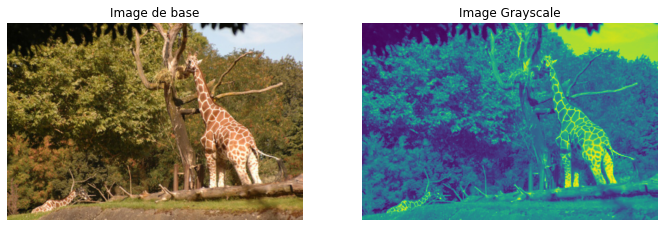

In [179]:
# Sobel - Passage en grayScale

img = str(sorted_blurry[0])
print(img)
print("Image de base 3D:",dst.shape)

#On perd une dimension
img2   = cv2.imread(img, cv2.IMREAD_GRAYSCALE)

print("Image Grayscaled 2D:",img2.shape)

plt.figure(figsize=(18, 6))

plt.subplot(131)
plt.imshow(im)
plt.axis('off')
plt.title("Image de base")

plt.subplot(132)
plt.imshow(img2)
plt.axis('off')
plt.title("Image Grayscale")


(426, 640)
(426, 640)
(426, 640)
dest2 : (426, 640, 6)
(426, 640, 3)


Text(0.5, 1.0, 'Addition')

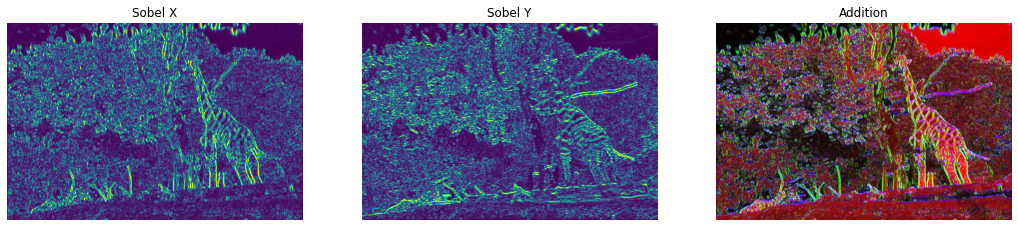

In [181]:
#Sobel GrayScale
sobelx = cv2.convertScaleAbs((cv2.Sobel(img2, cv2.CV_64F, 1, 0)))
sobely = cv2.convertScaleAbs((cv2.Sobel(img2, cv2.CV_64F, 0, 1)))

print(img2.shape)
print(sobelx.shape)
print(sobely.shape)


##HORRIBLE

#dest = np.dstack([img2, sobelx, sobely]).astype(np.uint8)
dest = cv2.merge((img2, sobelx, sobely))

print("dest2 :", dest2.shape)
print(dest.shape)
plt.figure(figsize=(18, 6))

plt.subplot(131)
plt.imshow(sobelx)
plt.axis('off')
plt.title("Sobel X")

plt.subplot(132)
plt.imshow(sobely)
plt.axis('off')
plt.title("Sobel Y")

plt.subplot(133)
plt.imshow(dest)
plt.axis('off')
plt.title("Addition")




explication du code

## Une étude de cas explicitant les compromis entre ces deux opérations. Cette partie du livrable doit inclure le bruitage d’images et montrer la perte de détails, ou l’affutage d’images et montrer l’apparition du bruit.

### Bruitage d'images

In [69]:
#code commenté

### Affutage d'images

In [70]:
#code commenté

### Explication des compromis

In [ ]:
#code commenté